# 第三次Pagerank的优化

我的主要想法集中在如何读取以及算法如何适配的问题上

9500
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 151, 152, 153, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 190, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 23

Text(0, 0.5, 'Node Name')

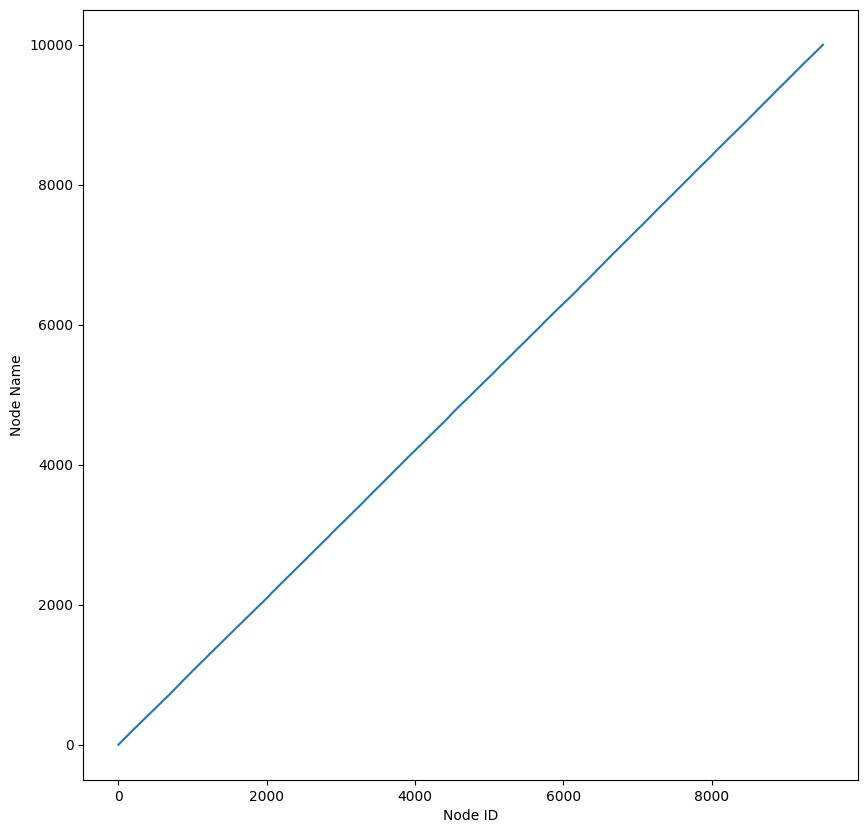

In [1]:
# 首先我们确定这个数据集有多少个节点，并且节点的命名是否是按照顺序的
node_list = []

def read_data(file_path):
    with open(file_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                from_node_id = int(parts[0])
                to_node_id = int(parts[1])
                if from_node_id not in node_list:
                    node_list.append(from_node_id)
                if to_node_id not in node_list: 
                    node_list.append(to_node_id)

read_data('Data.txt')
print(len(node_list))

# 我们给数组排下序
node_list.sort()

print(node_list)

import matplotlib.pyplot as plt
import numpy as np

# 定义一个函数，用于画图
plt.figure(figsize=(10, 10))
plt.plot(range(len(node_list)),node_list)
plt.xlabel('Node ID')
plt.ylabel('Node Name')

# 但是不是连续分布的

可以发现我们的节点是从1-9500完全正相关分布。

因此我们有分批次读入的想法，就是我们的缓存中每次就读取一行，然后存储，立即计算。

就是我们尽可能少地保存需要的节点。

In [9]:
transfrom = {}

for i in range(10):
    transfrom.clear()
    transfrom[i] = i
    
print(transfrom)

{9: 9}


In [45]:



length = 9500

# 我们利用及时计算的思想来处理：
hash_dict = {}
length = 9500
is_calculated2 = [False] * (length)


def HashMap(node_id):
    return hash_dict[node_id]

def ReverseHashMap(hash_value):
    for key, value in hash_dict.items():
        if value == hash_value:
            return key

def converge(r_old, r_new, epsilon):
    sum = 0
    for i in range(len(r_old)):
        sum += abs(r_new[i] - r_old[i])
    print("sum:", sum)
    return sum >= epsilon  # 返回True表示继续迭代

# 默认映射就是1-9500！ r_new的下标

# 我们的字典里一般存储1～2个元素


# 我们的字典里一般存储1～2个元素

def pagerank_1(Matrix,cur_r, epsilon=0.00001, beta=0.85): # 单轮pagerank
    r_old = cur_r.copy()

    r_new = [(1 - beta) / length] * length
    for i in range(length):
        source = ReverseHashMap(i)
        if source in Matrix:
            degree = Matrix[source]["degree"] #关于出度degree，有点说法！
        else:
            continue

        if degree == 0:
            # 处理悬挂节点：贡献均分给所有节点
            contribution = beta * r_old[i] / length
            for k in range(len(r_new)):
                r_new[k] += contribution
        else:
            contribution = beta * r_old[i] / degree
            for dest in Matrix[source]["dest"]:
                j = HashMap(dest)
                r_new[j] += contribution

    return r_new

def batch_read_data(file_path, round):
    global is_calculated2
    line_num = 0
    transM_instant = {}
    with open(file_path, "r") as file:
        for line in file:
            line_num += 1
            if round*10000 <= line_num and line_num < (round+1)*10000:
                parts = line.strip().split()
                from_node_id = int(parts[0])
                to_node_id = int(parts[1])
                if is_calculated2[HashMap(from_node_id)] == False and from_node_id not in transM_instant: #需要hash
                    transM_instant[from_node_id] = {"degree": 1, "dest": [to_node_id]}
                elif is_calculated2[HashMap(from_node_id)] == False and from_node_id in transM_instant:
                    transM_instant[from_node_id]["degree"] += 1
                    transM_instant[from_node_id]["dest"].append(to_node_id)

                if is_calculated2[HashMap(to_node_id)] == False and to_node_id not in transM_instant: #需要hash
                    transM_instant[to_node_id] = {"degree": 0, "dest": []}
                
            else:
                continue

    line_num = 0
    with open(file_path, "r") as file:
        for line2 in file:
            line_num += 1
            if round*10000 <= line_num and line_num < (round+1)*10000:
                continue
            parts2 = line2.strip().split()
            from_node_id2 = int(parts2[0])
            to_node_id2 = int(parts2[1])
            if from_node_id2 in transM_instant:
                transM_instant[from_node_id2]["degree"] += 1
                transM_instant[from_node_id2]["dest"].append(to_node_id2)
                
    return transM_instant
    

def pagerank_all(r, epsilon=0.0001, beta=0.85, file_path='Data.txt', total_batch=15):
    global is_calculated2
    r_old = r.copy()
    
    while True:
        r_new = [(1 - beta) / length] * length
        is_calculated2 = [False] * length

        for batch_id in range(total_batch):  # 每轮都读取所有 batch！
            transM = batch_read_data(file_path, batch_id)
            if transM == {}:
                continue
            for key in transM:
                is_calculated2[HashMap(key)] = True
            print("batch:", batch_id + 1)
            for source in transM:
                degree = transM[source]["degree"]
                if degree == 0:
                    contribution = (beta) * r_old[HashMap(source)] / length
                    for k in range(length):
                        r_new[k] += contribution
                else:
                    contribution = beta * r_old[HashMap(source)] / degree
                    for dest in transM[source]["dest"]:
                        j = HashMap(dest)
                        r_new[j] += contribution

        print("r_new:", r_new)
        print("sum:", sum(r_new))
        if not converge(r_old, r_new, epsilon):
            break
        r_old = r_new.copy()
    
    return r_new



# 需要一个标记数组看有没有没开盒过！
is_calculated = [False] * (length)

def calculate_RAM(file_path):
    res = [1.0 / length] * length
    # for i in range(5):
    #     res = instant_calculate_RAM(file_path,res,i)
    r_new =pagerank_all(res)
    return r_new

        
def GetTotalHash(file_path):
    global hash_dict
    with open(file_path, "r") as file:
        dict_num = 0
        for line in file:
            parts = line.strip().split()
            from_node_id = int(parts[0])
            to_node_id = int(parts[1])
            if from_node_id not in hash_dict:
                hash_dict[from_node_id] = dict_num
                dict_num += 1
            if to_node_id not in hash_dict:
                hash_dict[to_node_id] = dict_num
                dict_num += 1
            
        
def instant_calculate_RAM(file_path,vector_r,round):
    global cur_r, is_calculated,hash_dict
    print("round:",round)
    transM_instant = {}
    res_r = vector_r.copy()
    with open(file_path, "r") as file:
        from_node_id = 0
        to_node_id = 0
        line_num = 0
        for line in file:
            line_num += 1
            if round*30000 <= line_num and line_num < (round+1)*30000:
                parts = line.strip().split()
                from_node_id = int(parts[0])
                to_node_id = int(parts[1])
                if is_calculated[HashMap(from_node_id)] == False and from_node_id not in transM_instant: #需要hash
                    transM_instant[from_node_id] = {"degree": 1, "dest": [to_node_id]}
                elif is_calculated[HashMap(from_node_id)] == False and from_node_id in transM_instant:
                    transM_instant[from_node_id]["degree"] += 1
                    transM_instant[from_node_id]["dest"].append(to_node_id)

                if is_calculated[HashMap(to_node_id)] == False and to_node_id not in transM_instant: #需要hash
                    transM_instant[to_node_id] = {"degree": 0, "dest": [from_node_id]}
                
            else: 
                continue
    
    
    with open(file_path, "r") as file:
        line_num = 0
        for line2 in file:
            line_num += 1
            if round*10000 <= line_num and line_num < (round+1)*10000:
                continue
            parts2 = line2.strip().split()
            from_node_id2 = int(parts2[0])
            to_node_id2 = int(parts2[1])
            if from_node_id2 in transM_instant:
                transM_instant[from_node_id2]["degree"] += 1
                transM_instant[from_node_id2]["dest"].append(to_node_id2)
    
        print("input:",res_r)
        print("transM_instant:",transM_instant)
        res_r = pagerank_1(transM_instant, res_r)
        for key in transM_instant:
            is_calculated[HashMap(key)] = True
        transM_instant.clear()
       
        return res_r

GetTotalHash("Data.txt")
print(hash_dict)
print(len(hash_dict))
vector_r = calculate_RAM("Data.txt")

def get_top_100_indices(r_new):
    indexed_values = [(index, value) for index, value in enumerate(r_new)]
    indexed_values.sort(key=lambda x: x[1], reverse=True)
    top_100_indices = [
        (ReverseHashMap(index), value) for index, value in indexed_values[:100]
    ]
    return top_100_indices


top_100 = get_top_100_indices(vector_r)
print(top_100)




{6539: 0, 5619: 1, 1840: 2, 6885: 3, 1303: 4, 8932: 5, 2203: 6, 4493: 7, 2394: 8, 1809: 9, 8374: 10, 4841: 11, 8628: 12, 8895: 13, 6159: 14, 8781: 15, 1899: 16, 1049: 17, 3289: 18, 9077: 19, 3079: 20, 5295: 21, 1052: 22, 8532: 23, 5909: 24, 2190: 25, 8371: 26, 4543: 27, 8398: 28, 9372: 29, 5153: 30, 9791: 31, 6369: 32, 9530: 33, 8358: 34, 9973: 35, 2511: 36, 9160: 37, 3652: 38, 3347: 39, 9432: 40, 520: 41, 6392: 42, 5967: 43, 8961: 44, 7416: 45, 1354: 46, 4152: 47, 1723: 48, 4100: 49, 1533: 50, 7390: 51, 133: 52, 8983: 53, 2828: 54, 5406: 55, 4198: 56, 5519: 57, 8047: 58, 794: 59, 3928: 60, 6145: 61, 4537: 62, 2716: 63, 3149: 64, 3063: 65, 6640: 66, 4615: 67, 2164: 68, 7607: 69, 8469: 70, 3221: 71, 7980: 72, 7194: 73, 5856: 74, 8257: 75, 9517: 76, 4310: 77, 8698: 78, 4994: 79, 8576: 80, 1971: 81, 7876: 82, 4110: 83, 4880: 84, 507: 85, 1619: 86, 8848: 87, 9958: 88, 3306: 89, 9781: 90, 6162: 91, 5645: 92, 9582: 93, 3537: 94, 4697: 95, 7831: 96, 9158: 97, 7151: 98, 2178: 99, 9108: 100, 59

In [13]:

# 我们的字典里一般存储1～2个元素

def pagerank_1(Matrix,cur_r, epsilon=0.00001, beta=0.85): # 单轮pagerank
    r_old = cur_r.copy()

    r_new = [(1 - beta) / length] * length
    for i in range(length):
        source = ReverseHashMap(i)
        if source in Matrix:
            degree = Matrix[source]["degree"] #关于出度degree，有点说法！
        else:
            continue

        if degree == 0:
            # 处理悬挂节点：贡献均分给所有节点
            contribution = beta * r_old[i] / length
            for k in range(len(r_new)):
                r_new[k] += contribution
        else:
            contribution = beta * r_old[i] / degree
            for dest in Matrix[source]["dest"]:
                j = HashMap(dest)
                r_new[j] += contribution

    return r_new

def batch_read_data(file_path, round):
    line_num = 0
    transM_instant = {}
    with open(file_path, "r") as file:
        to_node_id = 0
        for line in file:
            line_num += 1
            if round*30000 <= line_num and line_num < (round+1)*30000:
                parts = line.strip().split()
                from_node_id = int(parts[0])
                to_node_id = int(parts[1])
                if is_calculated[HashMap(from_node_id)] == False and from_node_id not in transM_instant: #需要hash
                    transM_instant[from_node_id] = {"degree": 1, "dest": [to_node_id]}
                elif is_calculated[HashMap(from_node_id)] == False and from_node_id in transM_instant:
                    transM_instant[from_node_id]["degree"] += 1
                    transM_instant[from_node_id]["dest"].append(to_node_id)

                if is_calculated[HashMap(to_node_id)] == False and to_node_id not in transM_instant: #需要hash
                    transM_instant[to_node_id] = {"degree": 0, "dest": [from_node_id]}
                
            else: 
                continue


    with open(file_path, "r") as file:
        line_num = 0
        for line2 in file:
            line_num += 1
            if round*30000 <= line_num and line_num < (round+1)*30000:
                continue
            parts2 = line2.strip().split()
            from_node_id2 = int(parts2[0])
            to_node_id2 = int(parts2[1])
            if from_node_id2 in transM_instant:
                transM_instant[from_node_id2]["degree"] += 1
                transM_instant[from_node_id2]["dest"].append(to_node_id2)
                
    return transM_instant
    

def pagerank_all(r, epoch = 15,epsilon=0.00001, beta=0.85,file_path = 'Data.txt'): # pagerank所有分批
    r_old = r.copy()
    r_new = [0] * length
    while True:
        for i in range(epoch):
            transM_instant = batch_read_data(file_path, i)
            for i in range(length):
                source = ReverseHashMap(i)
            if source in transM_instant:
                degree = transM_instant[source]["degree"] #关于出度degree，有点说法！
            else:
                continue

            if degree == 0:
                # 处理悬挂节点：贡献均分给所有节点
                contribution = beta * r_old[i] / length
                for k in range(len(r_new)):
                    r_new[k] += contribution
            else:
                contribution = beta * r_old[i] / degree
                for dest in transM_instant[source]["dest"]:
                    j = HashMap(dest)
                    r_new[j] += contribution
        if not converge(r_old, r_new, epsilon):
            break
        r_old = r_new.copy()
    
    return r_new


In [43]:
is_calculated2 = [False]*9500
def batch_read_data(file_path, round):
    global is_calculated2
    line_num = 0
    transM_instant = {}
    with open(file_path, "r") as file:
        to_node_id = 0
        for line in file:
            line_num += 1
            if round*10000 <= line_num and line_num < (round+1)*10000:
                parts = line.strip().split()
                from_node_id = int(parts[0])
                to_node_id = int(parts[1])
                if is_calculated2[HashMap(from_node_id)] == False and from_node_id not in transM_instant: #需要hash
                    transM_instant[from_node_id] = {"degree": 1, "dest": [to_node_id]}
                elif is_calculated2[HashMap(from_node_id)] == False and from_node_id in transM_instant:
                    transM_instant[from_node_id]["degree"] += 1
                    transM_instant[from_node_id]["dest"].append(to_node_id)

                if is_calculated2[HashMap(to_node_id)] == False and to_node_id not in transM_instant: #需要hash
                    transM_instant[to_node_id] = {"degree": 0, "dest": [from_node_id]}
                
            else: 
                continue


    with open(file_path, "r") as file:
        line_num = 0
        for line2 in file:
            line_num += 1
            if round*10000 <= line_num and line_num < (round+1)*10000:
                continue
            parts2 = line2.strip().split()
            from_node_id2 = int(parts2[0])
            to_node_id2 = int(parts2[1])
            if from_node_id2 in transM_instant:
                transM_instant[from_node_id2]["degree"] += 1
                transM_instant[from_node_id2]["dest"].append(to_node_id2)
                
            
    return transM_instant

number = 0
    
transM1 = batch_read_data("Data.txt", 0)

for key in transM1:
    number += 1
    is_calculated2[HashMap(key)] = True

transM2 = batch_read_data("Data.txt", 1)

for key in transM2:
    number += 1
    is_calculated2[HashMap(key)] = True

transM3 = batch_read_data("Data.txt", 2)

for key in transM3:
    number += 1 
    is_calculated2[HashMap(key)] = True

transM4 = batch_read_data("Data.txt", 3)

for key in transM4:
    number += 1
    is_calculated2[HashMap(key)] = True

transM5 = batch_read_data("Data.txt", 4)

for key in transM5:
    number += 1
    is_calculated2[HashMap(key)] = True
    
transM6 = batch_read_data("Data.txt", 5)

for key in transM6:
    number += 1
    is_calculated2[HashMap(key)] = True
    
transM7 = batch_read_data("Data.txt", 6)

for key in transM7:
    number += 1
    is_calculated2[HashMap(key)] = True

for i in range(9500):
    if is_calculated2[i] == False:
        print(ReverseHashMap(i))

print(transM7)
        
        
for key,value in transM3.items():
    print(key,value)

9744
{9787: {'degree': 0, 'dest': [7200]}}
6459 {'degree': 15, 'dest': [5789, 7091, 9604, 7197, 1952, 2367, 2010, 9785, 4264, 320, 9559, 3094, 8332, 7852, 6804]}
3304 {'degree': 13, 'dest': [35, 629, 8826, 2135, 1339, 1827, 1884, 713, 8749, 9164, 1000, 4261, 7108]}
9481 {'degree': 0, 'dest': [6411]}
8373 {'degree': 0, 'dest': [6850]}
4148 {'degree': 0, 'dest': [5339]}
2545 {'degree': 11, 'dest': [3128, 2722, 5308, 1291, 3545, 1863, 6783, 1441, 2840, 3191, 8810, 6038]}
7156 {'degree': 0, 'dest': [4146]}
2329 {'degree': 20, 'dest': [471, 4182, 6825, 9834, 7842, 475, 8485, 9258, 809, 6746, 4445, 2299, 2763, 5642, 9911, 3040, 5171, 3529, 5733, 6718, 1375]}
2865 {'degree': 0, 'dest': [3693]}
11 {'degree': 15, 'dest': [3228, 5658, 3471, 3577, 8798, 1341, 2773, 1326, 2605, 5989, 947, 1622, 7892, 1159, 6299, 7332]}
6305 {'degree': 16, 'dest': [1577, 4266, 5112, 3234, 1990, 2568, 649, 1682, 7911, 1284, 8164, 2797, 1008, 2457, 5531, 7117, 3279]}
881 {'degree': 12, 'dest': [4508, 8631, 7526, 989,

In [33]:
print(hash_dict)

{6539: 0, 5619: 1, 1840: 2, 6885: 3, 1303: 4, 8932: 5, 2203: 6, 4493: 7, 2394: 8, 1809: 9, 8374: 10, 4841: 11, 8628: 12, 8895: 13, 6159: 14, 8781: 15, 1899: 16, 1049: 17, 3289: 18, 9077: 19, 3079: 20, 5295: 21, 1052: 22, 8532: 23, 5909: 24, 2190: 25, 8371: 26, 4543: 27, 8398: 28, 9372: 29, 5153: 30, 9791: 31, 6369: 32, 9530: 33, 8358: 34, 9973: 35, 2511: 36, 9160: 37, 3652: 38, 3347: 39, 9432: 40, 520: 41, 6392: 42, 5967: 43, 8961: 44, 7416: 45, 1354: 46, 4152: 47, 1723: 48, 4100: 49, 1533: 50, 7390: 51, 133: 52, 8983: 53, 2828: 54, 5406: 55, 4198: 56, 5519: 57, 8047: 58, 794: 59, 3928: 60, 6145: 61, 4537: 62, 2716: 63, 3149: 64, 3063: 65, 6640: 66, 4615: 67, 2164: 68, 7607: 69, 8469: 70, 3221: 71, 7980: 72, 7194: 73, 5856: 74, 8257: 75, 9517: 76, 4310: 77, 8698: 78, 4994: 79, 8576: 80, 1971: 81, 7876: 82, 4110: 83, 4880: 84, 507: 85, 1619: 86, 8848: 87, 9958: 88, 3306: 89, 9781: 90, 6162: 91, 5645: 92, 9582: 93, 3537: 94, 4697: 95, 7831: 96, 9158: 97, 7151: 98, 2178: 99, 9108: 100, 59